In [140]:
import pandas as pd
import numpy as np

import io
import requests

database_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv'

s = requests.get(database_url).content
dataset_origin = pd.read_csv(io.StringIO(s.decode('utf-8')))

# ===KONIEC ZADANIA 1 #

print(dataset_origin)


    Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0             P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1             P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2             P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3             P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4             P5   8   5  13  11   6   7   9  14   9  ...           0.27   
..           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...            ...   
806         P815   0   0   1   0   0   2   1   0   0  ...           0.00   
807         P816   0   1   0   0   1   2   2   6   0  ...           0.43   
808         P817   1   0   0   0   1   1   2   1   1  ...           0.50   
809         P818   0   0   0   1   0   0   0   0   1  ...           0.00   
810         P819   0   1   0   0   0   0   0   0   0  ...           0.00   

     Normalized 43  Normalized 44  Normalized 45  Normalized 46  \
0             0.22  

Podaj liczbę klastrów albo wciśnij Enter aby zaakceptować domyślną wartość(5): 5
Kmeans(0) czy Kmeans++(1)? 1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

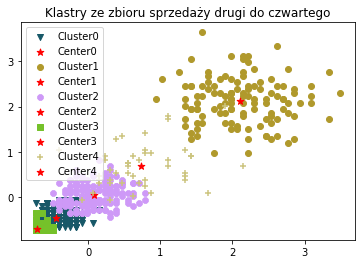

In [132]:
# ===ZADANIE 2 - Analiza skupień#

#KMEANS++
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

X = dataset_origin.iloc[:, 1:54]
pc = dataset_origin.iloc[:, 0]
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))

number_of_clusters = input("Podaj liczbę klastrów albo wciśnij Enter aby zaakceptować domyślną wartość(5): ")
alg = int(input("Kmeans(0) czy Kmeans++(1)? "))
while alg != 0 and alg !=1:
    alg = input("Błedny wybór\nKmeans(0) czy Kmeans++(1)? ")
    print(alg)
a = {0:'random',1:'k-means++'}
if number_of_clusters:
    kmeans = KMeans(init=a[alg],n_clusters=int(number_of_clusters), random_state=0).fit(scaled_X)

else:
    number_of_clusters = 5
    kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_X)
y_means = kmeans.fit_predict(scaled_X)

dataset = dataset_origin
dataset['Class'] = y_means

#wyświetlanie danych dla pierwszego tygodnia
import random
icons = ['v','o','8','s','+','x','d','D','1']
for i in range(int(number_of_clusters)):
    color = (random.random(), random.random(), random.random())
    l = "Cluster" + str(i)
    plt.scatter(scaled_X[y_means == i][1], scaled_X[y_means == i][3], c=color, label=l,marker=icons[i])
    plt.scatter(kmeans.cluster_centers_[i][1], kmeans.cluster_centers_[i][3], c='red',label="Center"+str(i), marker='*',s=50)
    
plt.title("Klastry ze zbioru sprzedaży drugi do czwartego")
plt.xlabel = "Pierwszy tydzień"
plt.ylabel = "Szósty tydzień"
plt.legend()
plt.show()

dataset.to_csv("Sales_Transactions_Dataset_Weekly_Kmeans.csv")

Wybierz metrykę sposród wymienionych: ward, complete, average, single ward
    Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 44  \
0             P1  11  12  10   8  13  12  14  21   6  ...           0.28   
1             P2   7   6   3   2   7   1   6   3   3  ...           0.50   
2             P3   7  11   8   9  10   8   7  13  12  ...           0.18   
3             P4  12   8  13   5   9   6   9  13  13  ...           0.06   
4             P5   8   5  13  11   6   7   9  14   9  ...           0.27   
..           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...            ...   
806         P815   0   0   1   0   0   2   1   0   0  ...           0.33   
807         P816   0   1   0   0   1   2   2   6   0  ...           0.57   
808         P817   1   0   0   0   1   1   2   1   1  ...           0.00   
809         P818   0   0   0   1   0   0   0   0   1  ...           0.00   
810         P819   0   1   0   0   0   0   0   0   0  ...           0.00   

     Normali

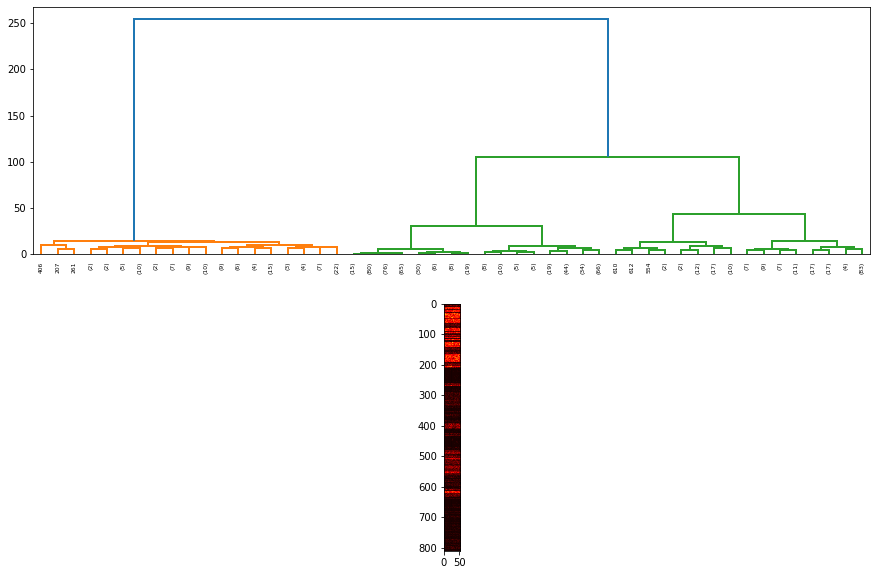

In [139]:
# Zadanie 3

# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

metric = input("Wybierz metrykę sposród wymienionych: ward, complete, average, single ")
metrics = ['ward','complete','average','single']
while metric not in metrics:
    metric = input("Błędny wybór\nWybierz metrykę sposród wymienionych: ward, complete, average, single ")

clustering = AgglomerativeClustering(n_clusters=int(number_of_clusters), linkage=metric)
y_cluster = clustering.fit_predict(scaled_X)
n_samples = len(clustering.labels_)
counts = np.zeros(clustering.children_.shape[0])


dataset_aggclust = dataset_origin
print(dataset_origin)
dataset_aggclust['class'] = y_cluster

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for i, merge in enumerate(clustering.children_):
    curr = 0
    for child_idx in merge:
        if child_idx < n_samples:
            curr += 1 #liść
        else:
            curr += counts[child_idx - n_samples]
        counts[i] = curr
        
    Z = linkage(scaled_X, metric)
    dendrogram(Z, truncate_mode='level', p=int(number_of_clusters), ax=ax1)
    ax2.imshow(scaled_X, cmap='hot',interpolation='nearest')

plt.show()

dataset_aggclust.to_csv("Sales_Transactions_Dataset_Weekly_Agg.csv")

['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
Wybierz metrykę spośród wymienionych: l2
    Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 43  \
0             P1  11  12  10   8  13  12  14  21   6  ...           0.22   
1             P2   7   6   3   2   7   1   6   3   3  ...           0.40   
2             P3   7  11   8   9  10   8   7  13  12  ...           1.00   
3             P4  12   8  13   5   9   6   9  13  13  ...           0.47   
4             P5   8   5  13  11   6   7   9  14   9  ...           0.53   
..           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...            ...   
806         P815   0   0   1   0   0   2   1   0   0  ...           0.33   
807         P816   0   1   0   0   1   2   2   6   0  ...           0.43   
808         P817   1   0   0   0   1   1   2   1   1  ...           0.00   
809         P818   0   0   0   1   0   0   0   0   1  ...           0.00   
810         P819   0   1   0   0   0   0   0   0   0  ...    

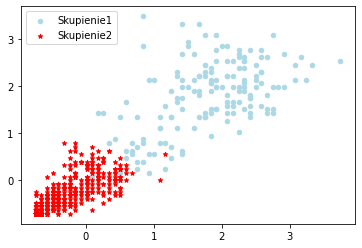

In [162]:
## ZADANIE 3 DBSCAN

from sklearn.cluster import DBSCAN

metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
print(metrics)
metric = input("Wybierz metrykę spośród wymienionych: ")
while metric not in metrics:
    print("Błędny wybór\n")
    print("Wybierz metrykę sposród wymienionych:")
    print(metrics)
    metric = input()
dbscan = DBSCAN(metric=metric,eps=3)

y_scan = dbscan.fit_predict(scaled_X)
dataset_dbscan = dataset_origin
print(dataset_dbscan)
dataset_dbscan['class'] = y_scan
print(dataset_dbscan)

plt.scatter(scaled_X[dataset_dbscan['class'] == -1][0],scaled_X[dataset_dbscan['class'] == -1][1], c='lightblue', marker='o', s=20, label="Skupienie1")
plt.scatter(scaled_X[dataset_dbscan['class'] == 0][0],scaled_X[dataset_dbscan['class'] == 0][1], c='red', marker='*', s=20, label="Skupienie2")
plt.legend()
plt.show()

dataset_dbscan.to_csv("Sales_Transactions_Dataset_Weekly_DBSCAN.csv")

Dla n_clusters = 2 Średni wynik miary silhouette wynosi : 0.7379906824653444
Dla n_clusters = 3 Średni wynik miary silhouette wynosi : 0.6111652015417173
Dla n_clusters = 4 Średni wynik miary silhouette wynosi : 0.5648007867785824
Dla n_clusters = 5 Średni wynik miary silhouette wynosi : 0.4502375899176931
Dla n_clusters = 6 Średni wynik miary silhouette wynosi : 0.3892527152854959
Dla n_clusters = 7 Średni wynik miary silhouette wynosi : 0.36048537291723026
Dla n_clusters = 8 Średni wynik miary silhouette wynosi : 0.35610339798916035
Dla n_clusters = 9 Średni wynik miary silhouette wynosi : 0.2849461010296092
Dla n_clusters = 10 Średni wynik miary silhouette wynosi : 0.281960974789051


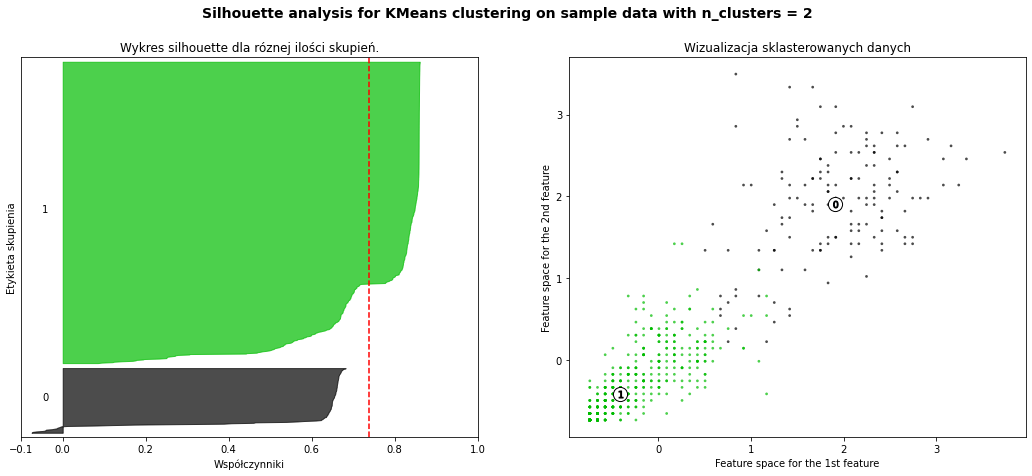

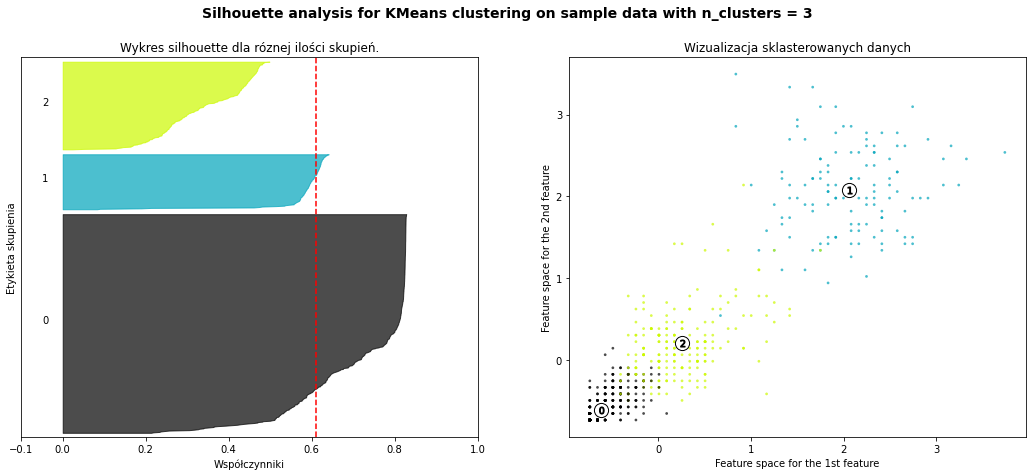

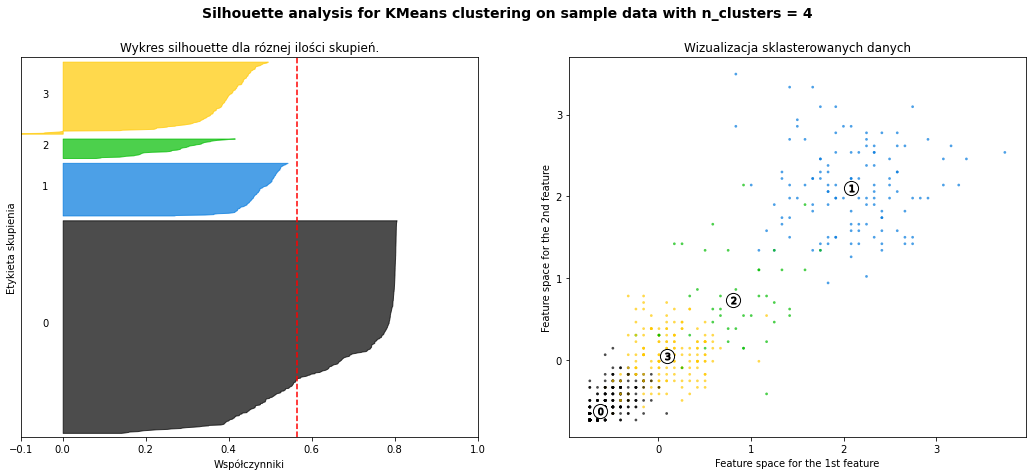

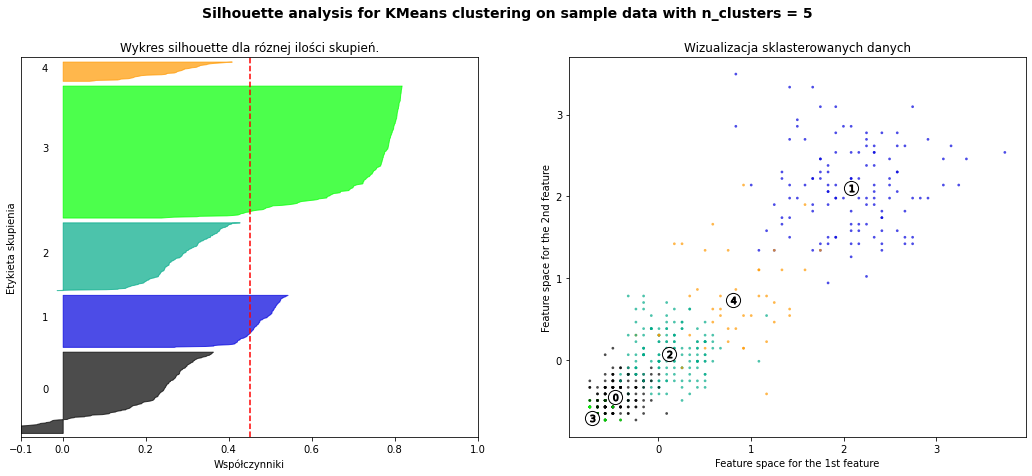

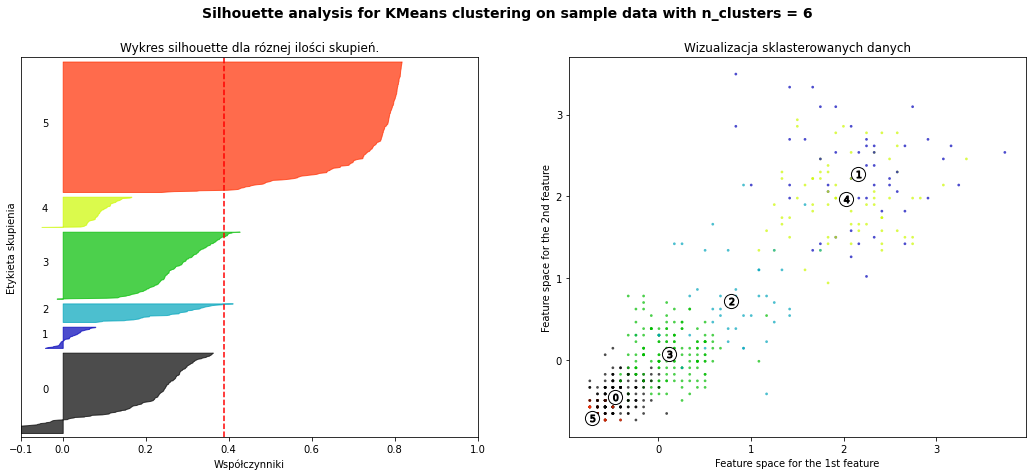

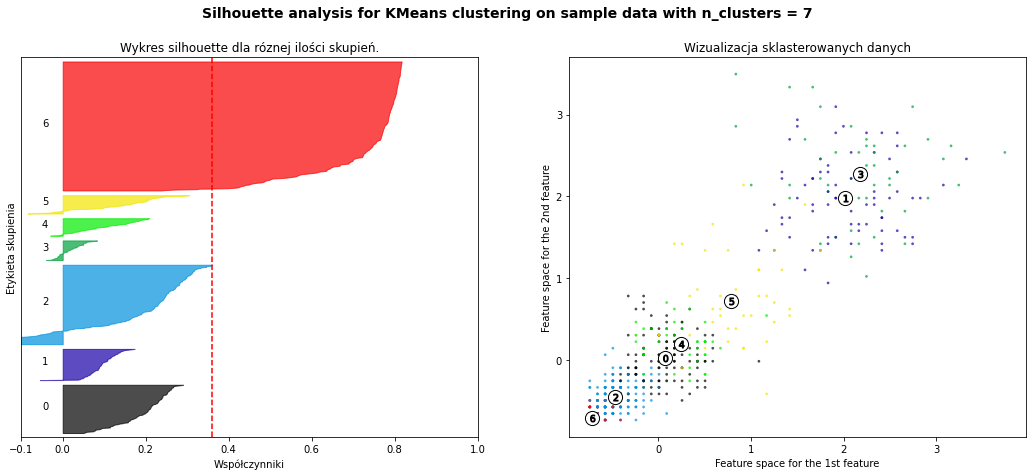

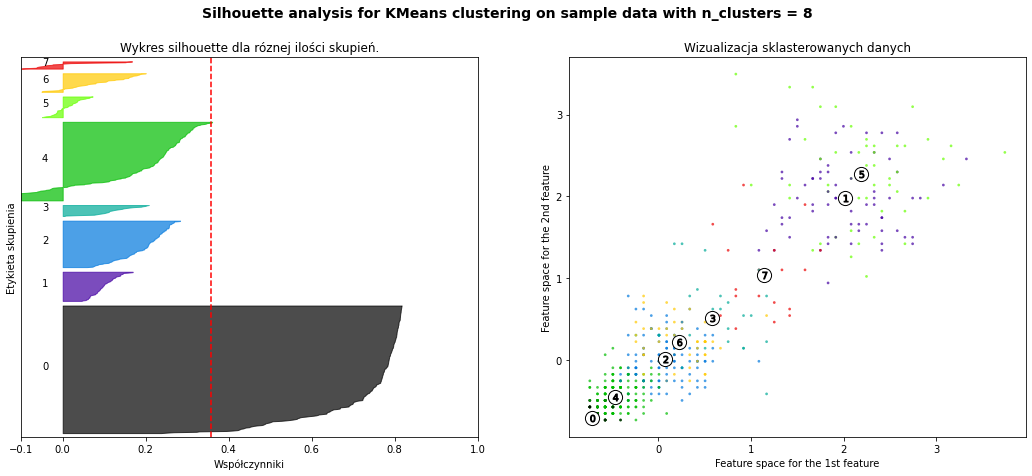

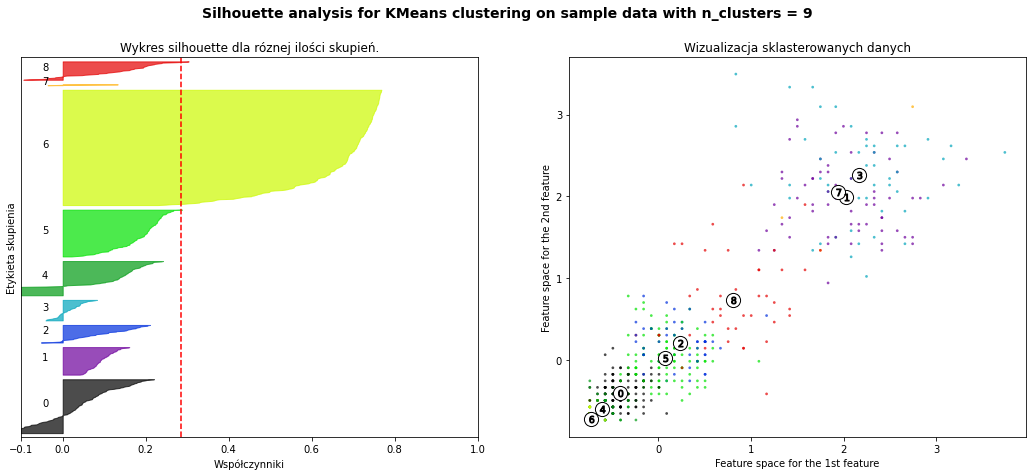

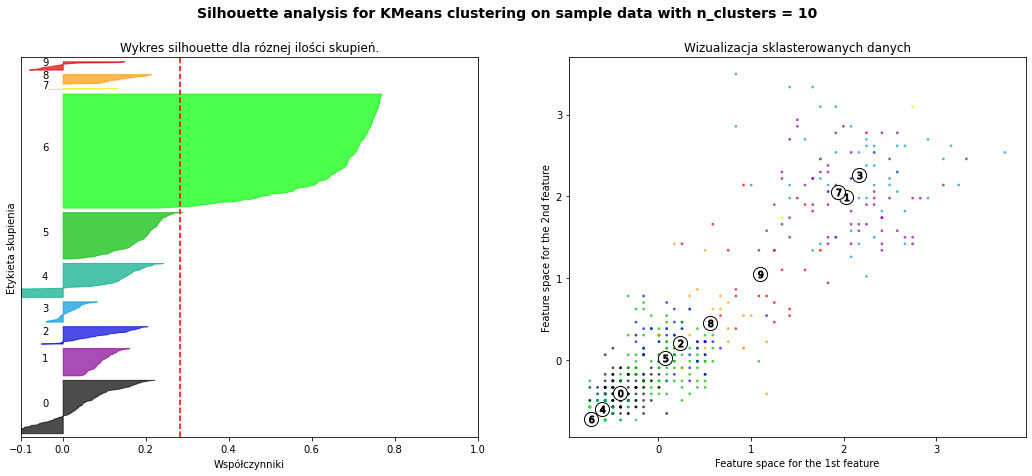

In [174]:
# ZADANIE 4 KMEANS

from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

for n_clusters in range(2,11):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(scaled_X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(scaled_X)
    cluster_labels = clusterer.predict(scaled_X)
    
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    print("Dla n_clusters =", n_clusters,
          "Średni wynik miary silhouette wynosi :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(scaled_X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  
    ax1.set_title("Wykres silhouette dla róznej ilości skupień.")
    ax1.set_xlabel("Współczynniki")
    ax1.set_ylabel("Etykieta skupienia")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_X[:][0], scaled_X[:][1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Wizualizacja sklasterowanych danych")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Dla n_clusters = 2 Średni wynik miary silhouette wynosi : 0.7464270500881505
Dla n_clusters = 3 Średni wynik miary silhouette wynosi : 0.6098585008702545
Dla n_clusters = 4 Średni wynik miary silhouette wynosi : 0.5661741110014147
Dla n_clusters = 5 Średni wynik miary silhouette wynosi : 0.4493841295127132
Dla n_clusters = 6 Średni wynik miary silhouette wynosi : 0.42760119493156135
Dla n_clusters = 7 Średni wynik miary silhouette wynosi : 0.3968762135686546
Dla n_clusters = 8 Średni wynik miary silhouette wynosi : 0.35538526075331056
Dla n_clusters = 9 Średni wynik miary silhouette wynosi : 0.35724512095120553
Dla n_clusters = 10 Średni wynik miary silhouette wynosi : 0.35764937283515297


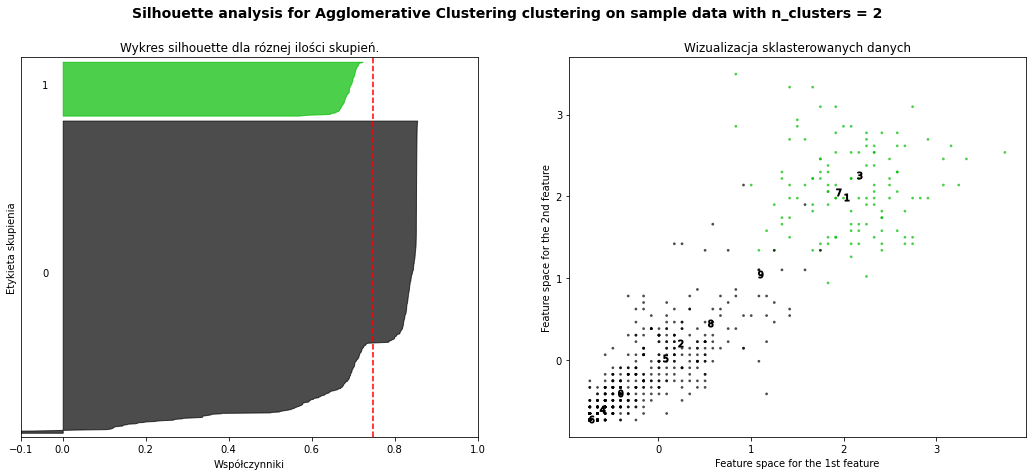

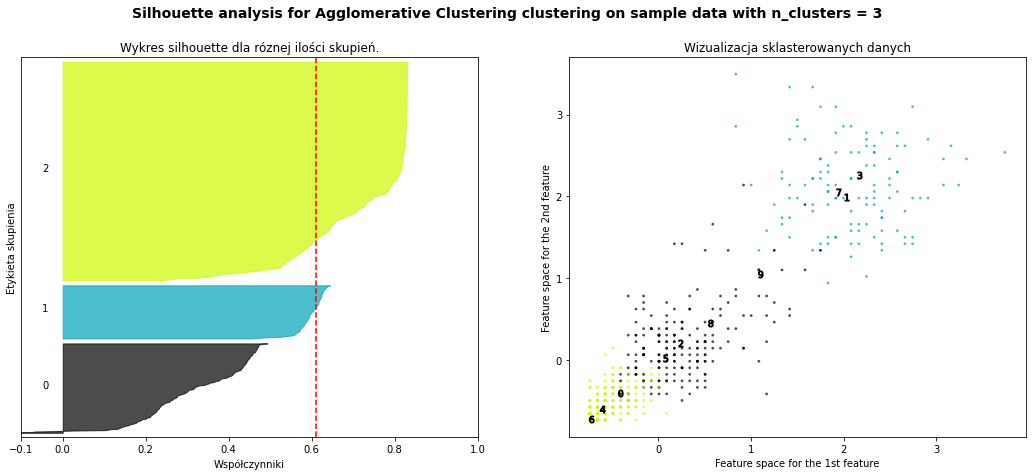

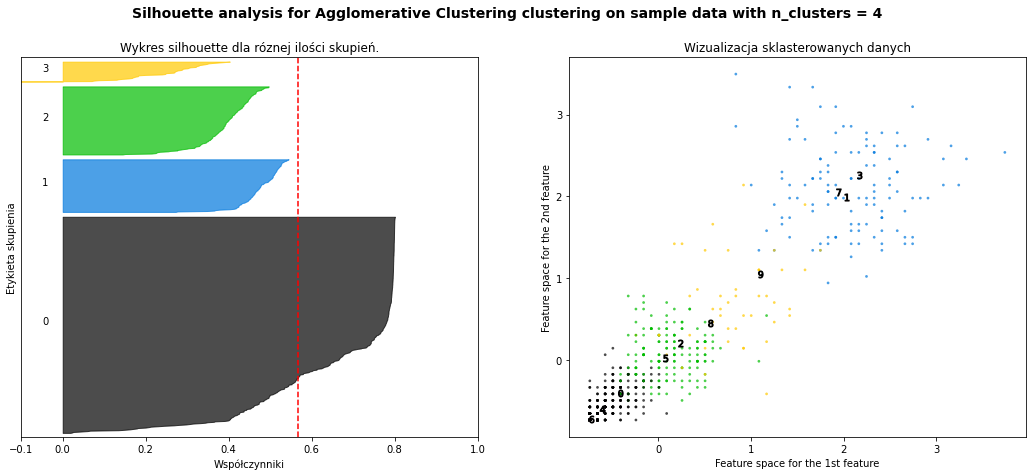

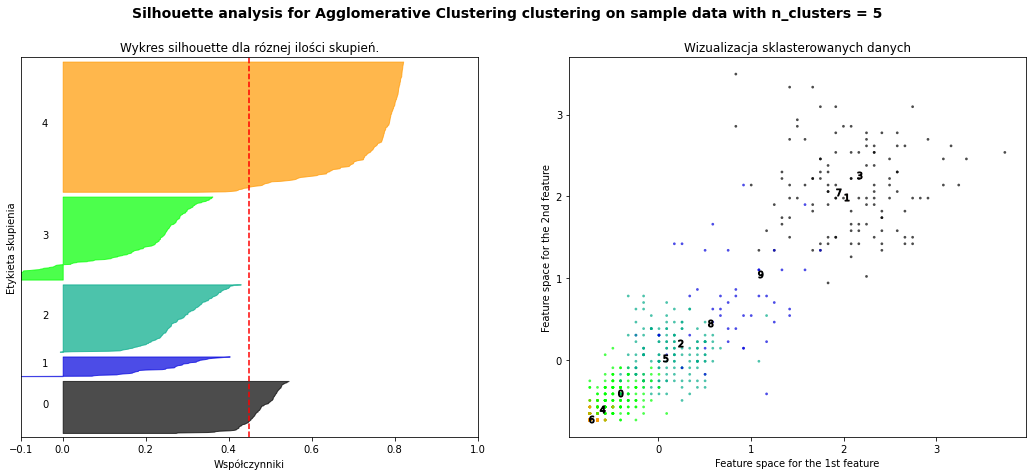

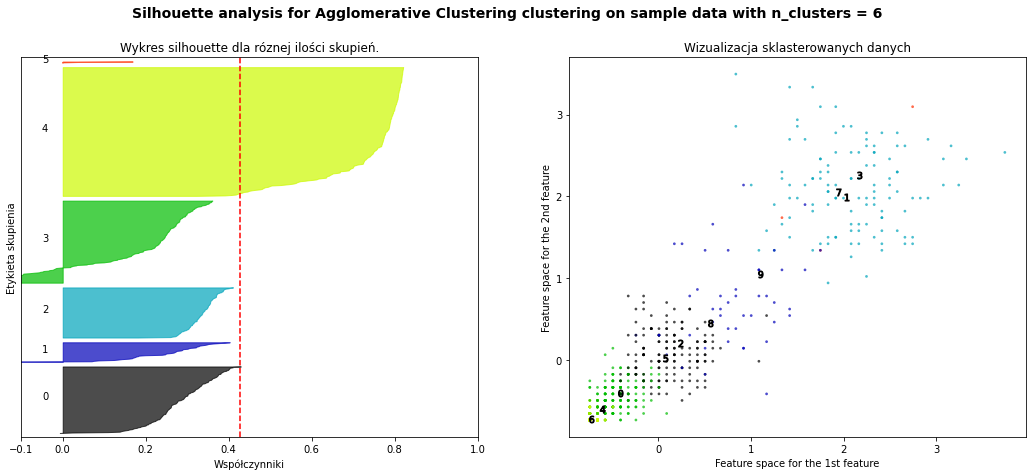

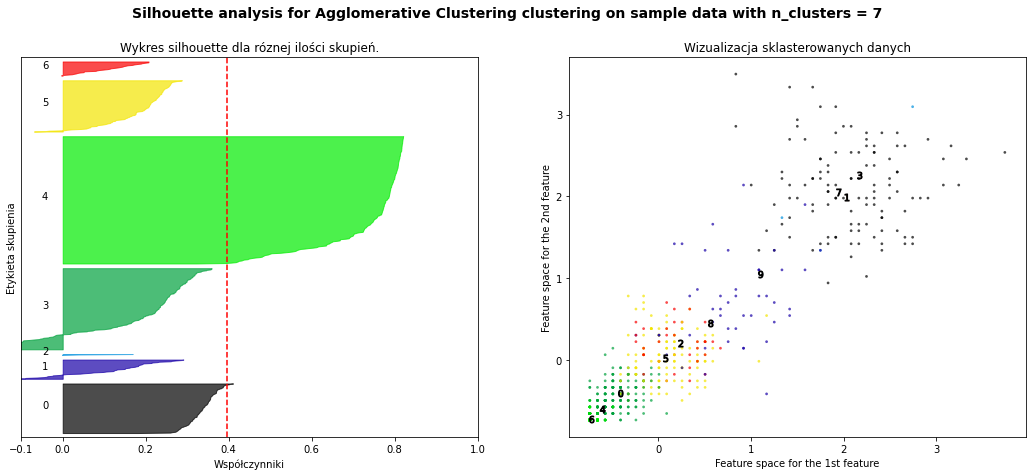

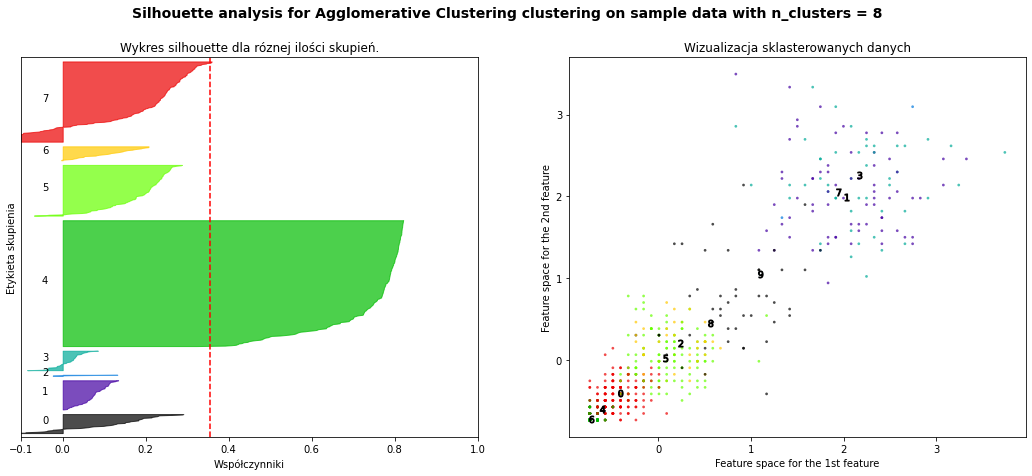

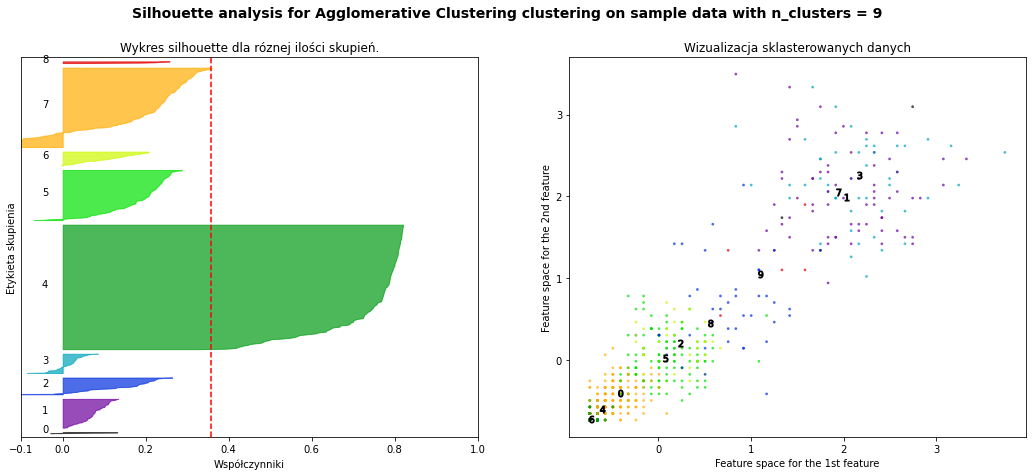

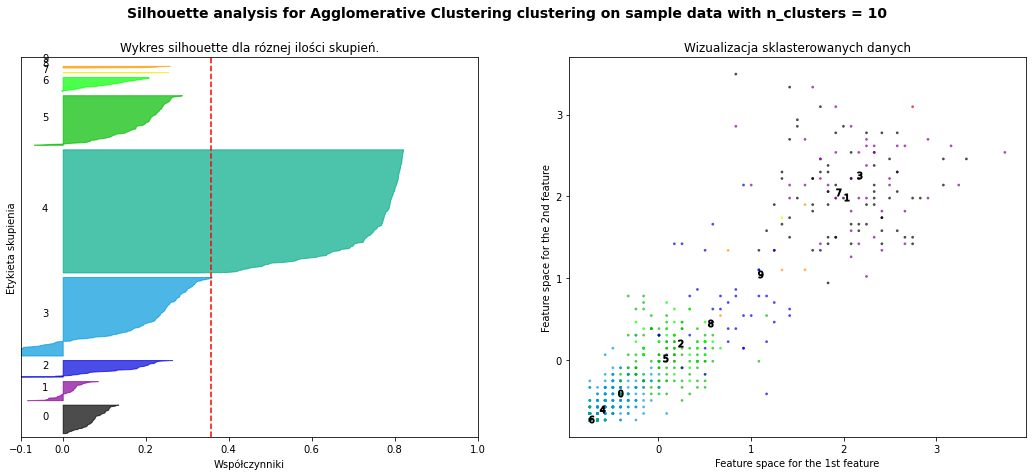

In [180]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

for n_clusters in range(2,11):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(scaled_X) + (n_clusters + 1) * 10])
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(scaled_X)
    
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    print("Dla n_clusters =", n_clusters,
          "Średni wynik miary silhouette wynosi :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(scaled_X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  
    ax1.set_title("Wykres silhouette dla róznej ilości skupień.")
    ax1.set_xlabel("Współczynniki")
    ax1.set_ylabel("Etykieta skupienia")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_X[:][0], scaled_X[:][1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Wizualizacja sklasterowanych danych")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Agglomerative Clustering clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()